# Heart failure prediction project. 

## What is this project about? 

### Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.

### Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

### Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

### People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.



# **About the project**. 

## These are the steps that were taken in order to solve this project:

1) Exploratory Data Analysis (EDA)
2) **Look for data leakage, and outliers**. 
3) Feature engineering and feature selection. 
4) Model training. 
5) Model testing.
6) Discussion about the results. 
7) Model deployment. 


# **EXPLORATORY DATA ANALYSIS**

##  **1) Packages**. 

In [3]:
import xgboost
import shap
import pickle
import numpy as np 
import pandas as pd 
import seaborn as sns 
import warnings
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from ipywidgets import widgets
from plotly.offline import init_notebook_mode



from lifelines import KaplanMeierFitter
from collections import Counter


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold, cross_val_score, cross_validate
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE



init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
%matplotlib inline

## **2) Data loading and exploration**. 

## Features and target variable:

* `Age` : age of the person
* `Anaemia` : decrease of red blood cells or hemoglobin  **0** No ,**1** Yes (boolean). 
* `Creatinine phosphokinase`: Level of the CPK enzyme in the blood (mcg/L)
* `Diabetes`: If the patient has diabetes **0** No ,**1** Yes(boolean)
* `Ejection fraction`: Percentage of blood leaving the heart at each contraction (percentage)
* `High blood pressure`: If the patient has hypertension   **0**  No ,**1** Yes (boolean)
* `Platelets`: Platelets in the blood (kiloplatelets/mL)
* `Serum creatinine`: Level of serum creatinine in the blood (mg/dL)
* `Serum sodium`: Level of serum sodium in the blood (mEq/L)
* `Sex`: Woman **0** or man **1** (binary)
* `Smoking`: If the patient smokes or not  **0**  No ,**1** Yes(boolean)
* `Time`: Follow-up period (days) 
* `Death event` ( _**target variable**_): If the patient deceased during the follow-up period   **0** No ,**1** Yes (boolean)

In [2]:
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Checking if there are null values in the dataset. 

In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## There are not null values. 

## Descriptive statistics about the numerical features. 

In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

## **Categorical and numerical columns**. 

In [8]:
categorical_cols = df.loc(axis=1)['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT']
numerical_cols = df.loc(axis=1)['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']

In [9]:
categorical_cols

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,0,0,1,1,0,1
1,0,0,0,1,0,1
2,0,0,0,1,1,1
3,1,0,0,1,0,1
4,1,1,0,0,0,1
...,...,...,...,...,...,...
294,0,1,1,1,1,0
295,0,0,0,0,0,0
296,0,1,0,0,0,0
297,0,0,0,1,1,0


In [10]:
numerical_cols

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8
...,...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143,270
295,55.0,1820,38,270000.00,1.2,139,271
296,45.0,2060,60,742000.00,0.8,138,278
297,45.0,2413,38,140000.00,1.4,140,280


In [11]:
numerical_cols.describe().loc(axis=0)['min','max']

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
min,40.0,23.0,14.0,25100.0,0.5,113.0,4.0
max,95.0,7861.0,80.0,850000.0,9.4,148.0,285.0


## **Survival Analysis using Kaplan-Meier plots.**

In [12]:
def km_fits(data, hue=None, split_points=None):
    
    if hue in categorical_cols.columns:
        
        range_hue = np.unique(data[hue])
        
        X = [data[data[hue]==x]['time'] for x in range_hue]
        Y = [data[data[hue]==y]['DEATH_EVENT'] for y in range_hue]
        fit_label = [str(hue + ': ' + str(range_hue_i)) for range_hue_i in range_hue]
        
        
    elif hue in numerical_cols.columns:
        
        bins = pd.cut(x=data[hue],bins=split_points)
        range_hue = np.unique(bins)
        hue_group = str(hue) + "_group"
        data[hue_group] = pd.cut(x=data[hue], bins=split_points)
        
        X = [data[data[hue_group] == bin_range]['time'] for bin_range in range_hue]      
        Y = [data[data[hue_group] == bin_range]['DEATH_EVENT'] for bin_range in range_hue]        
        fit_label = [str(str(range_hue_i).replace(',',' -').replace(']',')')) for range_hue_i in range_hue]        
        data.drop(hue_group, axis=1, inplace=True)
        
    fits = [KaplanMeierFitter().fit(x_i, event_observed = y_i, label=fit_label[i]) for i,(x_i, y_i) in enumerate(zip(X,Y))]
    
    return fits

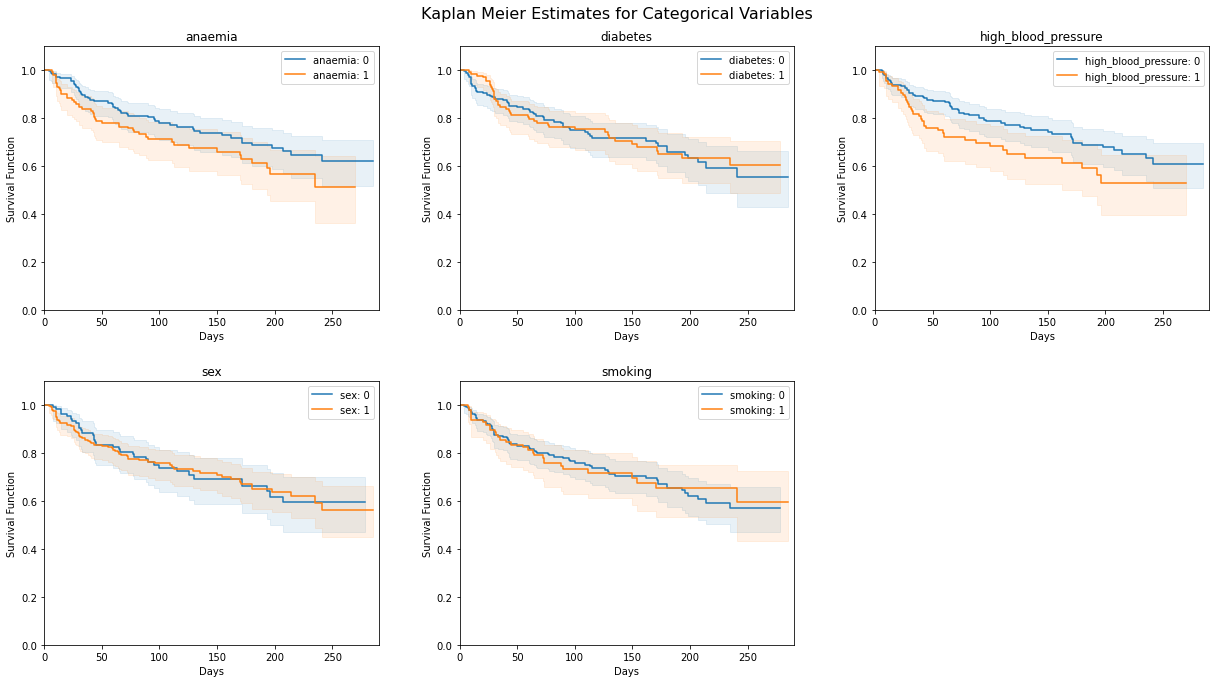

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18,10))
plt.tight_layout(pad=5.0)

for i,feat in enumerate(categorical_cols.drop('DEATH_EVENT',axis=1).columns):
    cat_fits = km_fits(df, hue=feat)

    [x.plot(title=feat, ylabel="Survival Function", xlabel="Days",
            ylim=(0,1.1), xlim=(0,290),
            ci_alpha=0.1, ax=ax.flatten()[i]) for x in cat_fits]

ax.flatten()[-1].set_visible(False)
fig.suptitle("Kaplan Meier Estimates for Categorical Variables ", fontsize=16.0)
plt.show()

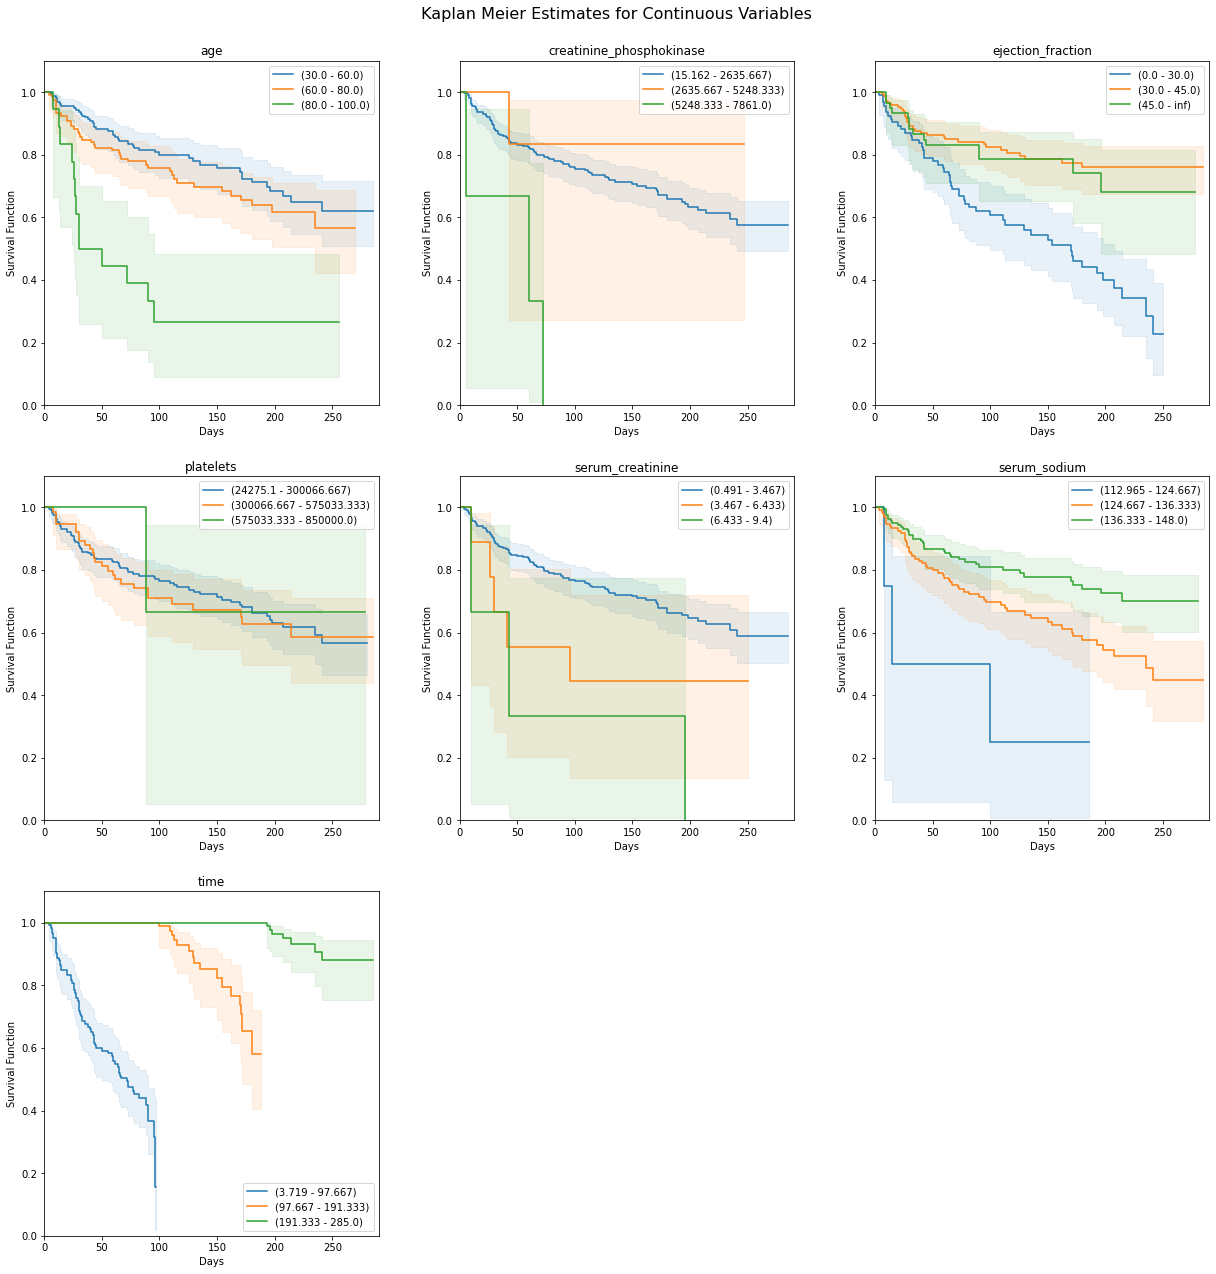

In [14]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18,18))

plt.tight_layout(pad=5.0)

split_points = [[30.0,60.0,80.0,100.0],3,[0,30.0,45.0,np.inf],3,3,3,3]

for i,feat in enumerate(numerical_cols.columns):
    con_fits = km_fits(df, hue=feat,split_points=split_points[i])

    [x.plot(title=feat, ylabel="Survival Function", xlabel="Days",
            ylim=(0,1.1), xlim=(0,290), ci_alpha=0.1, 
            ax=ax.flatten()[i]) for x in con_fits]

ax.flatten()[-1].set_visible(False)
ax.flatten()[-2].set_visible(False)

fig.suptitle("Kaplan Meier Estimates for Continuous Variables ", fontsize=16.0, y=1.0)

plt.show()

## **3) Visualizing the data**

## **Visualizing survival based on different binary features**. 


### **Survival based on sex**:


In [15]:
male = df[df["sex"]==1]
female = df[df["sex"]==0]

male_survived = len(male[male['DEATH_EVENT']==0])
male_not_survived = len(male[male['DEATH_EVENT']==1])

female_survived = len(female[female['DEATH_EVENT']==0])
female_not_survived = len(female[female['DEATH_EVENT']==1])

male_plot = [male_survived,male_not_survived] 
female_plot = [female_survived,female_not_survived]

death = ['Survived','Not survived']
fig = go.Figure()
fig.add_trace(go.Bar(
    x=death,
    name='Male',
    y=male_plot,
    marker_color='lightcoral'
))
fig.add_trace(go.Bar(
    x=death,
    name='Female',
    y=female_plot,
    marker_color='lightslategrey'
))

fig.update_layout(barmode='group', 
                  xaxis_tickangle=-45,
                  title_text="Survival based on gender",
                  xaxis_title="Survival")
fig.show()


## Based on this graph, more men died compared to women. 

### **Survival based on diabetes**. 



In [16]:
diabetes = df[df["diabetes"]==1]
no_diabetes = df[df["diabetes"]==0]

diabetes_survived = len(diabetes[diabetes['DEATH_EVENT']==0])
diabetes_not_survived = len(diabetes[diabetes['DEATH_EVENT']==1])

no_diabetes_survived = len(no_diabetes[no_diabetes['DEATH_EVENT']==0])
no_diabetes_not_survived = len(no_diabetes[no_diabetes['DEATH_EVENT']==1])

diabetes_plot=[diabetes_survived,diabetes_not_survived]
no_diabetes_plot=[no_diabetes_survived,no_diabetes_not_survived]


death = ['Survived','Not survived']
fig = go.Figure()
fig.add_trace(go.Bar(
    x=death,
    name='Diabetes',
    y=diabetes_plot,
    marker_color='lightcoral'
))

fig.add_trace(go.Bar(
    x=death,
    name='No Diabetes',
    y=no_diabetes_plot,
    marker_color='lightslategrey'
))

fig.update_layout(barmode='group', 
                  xaxis_tickangle=-45,
                  title_text="Survival based on diabetes",
                  xaxis_title="Survival")
fig.show()


### **Survival based on anemia**. 



In [17]:
anaemia = df[df["anaemia"]==1]
no_anaemia = df[df["anaemia"]==0]

anaemia_survived = len(anaemia[anaemia['DEATH_EVENT']==0])
anaemia_not_survived = len(anaemia[anaemia['DEATH_EVENT']==1])

no_anaemia_survived = len(no_anaemia[no_anaemia['DEATH_EVENT']==0])
no_anaemia_not_survived = len(no_anaemia[no_anaemia['DEATH_EVENT']==1])

anemia_plot=[anaemia_survived,anaemia_not_survived]
no_anemia_plot=[no_anaemia_survived,no_anaemia_not_survived]


death = ['Survived','Not survived']
fig = go.Figure()
fig.add_trace(go.Bar(
    x=death,
    name='Anemia',
    y=anemia_plot,
    marker_color='lightcoral'
))

fig.add_trace(go.Bar(
    x=death,
    name='No Anemia',
    y=no_anemia_plot,
    marker_color='lightslategrey'
))

fig.update_layout(barmode='group', 
                  xaxis_tickangle=-45,
                  title_text="Survival based on anemia",
                  xaxis_title="Survival")
fig.show()


### **Survival based on smoking**. 



In [18]:
smoke = df[df["smoking"]==1]
no_smoke = df[df["smoking"]==0]

smoke_survived = len(smoke[smoke['DEATH_EVENT']==0])
smoke_not_survived = len(smoke[smoke['DEATH_EVENT']==1])

no_smoke_survived = len(no_smoke[no_smoke['DEATH_EVENT']==0])
no_smoke_not_survived = len(no_smoke[no_smoke['DEATH_EVENT']==1])

smoke_plot=[smoke_survived,smoke_not_survived]
no_smoke_plot=[no_smoke_survived,no_smoke_not_survived]


death = ['Survived','Not survived']
fig = go.Figure()
fig.add_trace(go.Bar(
    x=death,
    name='Smoke',
    y=smoke_plot,
    marker_color='lightcoral'
))

fig.add_trace(go.Bar(
    x=death,
    name='No Smoke',
    y=no_smoke_plot,
    marker_color='lightslategrey'
))

fig.update_layout(barmode='group', 
                  xaxis_tickangle=-45,
                  title_text="Survival based on smoking",
                  xaxis_title="Survival")
fig.show()

### **Survival based on blood pressure**.


In [19]:
hypertension = df[df["high_blood_pressure"]==1]
no_hypertension = df[df["high_blood_pressure"]==0]

hypertension_survived = len(hypertension[hypertension['DEATH_EVENT']==0])
hypertension_not_survived = len(hypertension[hypertension['DEATH_EVENT']==1])

no_hypertension_survived = len(no_hypertension[no_hypertension['DEATH_EVENT']==0])
no_hypertension_not_survived = len(no_hypertension[no_hypertension['DEATH_EVENT']==1])

hypertension_plot=[hypertension_survived,hypertension_not_survived]
no_hypertension_plot=[no_hypertension_survived,no_hypertension_not_survived]


death = ['Survived','Not survived']
fig = go.Figure()
fig.add_trace(go.Bar(
    x=death,
    name='Hypertension',
    y=hypertension_plot,
    marker_color='lightcoral'
))

fig.add_trace(go.Bar(
    x=death,
    name='No Hypertension',
    y=no_hypertension_plot,
    marker_color='lightslategrey'
))

fig.update_layout(barmode='group', 
                  xaxis_tickangle=-45,
                  title_text="Survival based on Hypertension",
                  xaxis_title="Survival")
fig.show()

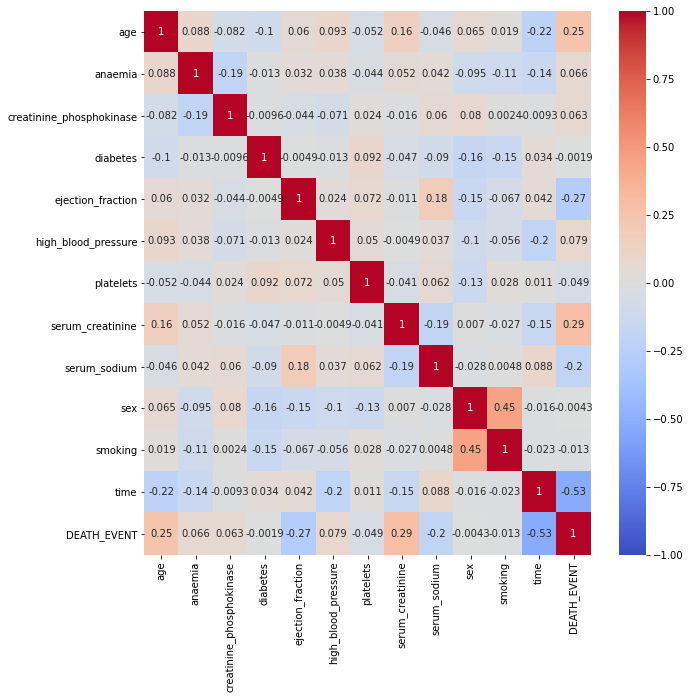

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=-1, cmap = "coolwarm",annot=True);

### Based on the correlation graph it seems that age and serum creatinine are the most highly correlated features with survival. 

## **Age and death event distribution**. 

In [21]:
fig = px.histogram(df, x="age", color="DEATH_EVENT", marginal="violin",nbins = 20)
fig.show()

In [22]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

## The age range with the highest number of deaths is 58 to 62 and 68 to 72. 

## **Data preparation and modeling**. 

## Feature scaling using standar scaler. 

In [23]:
scaler = StandardScaler()

df_scaled = df.copy()
df_scaled.loc(axis=1)[numerical_cols.columns] = scaler.fit_transform(df.loc(axis=1)[numerical_cols.columns]) 

In [24]:
df_scaled.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.192945,0,0.000166,0,-1.530560,1,1.681648e-02,0.490057,-1.504036,1,0,-1.629502,1
1,-0.491279,0,7.514640,0,-0.007077,0,7.535660e-09,-0.284552,-0.141976,1,0,-1.603691,1
2,0.350833,0,-0.449939,0,-1.530560,0,-1.038073e+00,-0.090900,-1.731046,1,1,-1.590785,1
3,-0.912335,1,-0.486071,0,-1.530560,0,-5.464741e-01,0.490057,0.085034,1,0,-1.590785,1
4,0.350833,1,-0.435486,1,-1.530560,0,6.517986e-01,1.264666,-4.682176,0,0,-1.577879,1


In [25]:
RANDOM_STATE = 2

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_STATE)

feat_set = ['Leakage', 'Baseline']

# create list of models to evaluate
models = [LogisticRegression(), 
          RandomForestClassifier(random_state=RANDOM_STATE), 
          XGBClassifier(verbosity=0, use_label_encoder = False, 
                        random_state=RANDOM_STATE, eval_metric='logloss'),
          GradientBoostingClassifier(random_state=RANDOM_STATE),
          SVC(kernel='sigmoid'),
          QuadraticDiscriminantAnalysis()]

model_names = [mod.__class__.__name__ for mod in models]

mod_cols = ['Name', 
            'Parameters',
            'Time']

df_mod = pd.DataFrame(columns=mod_cols)

for i in range(len(feat_set)):

    # Features
    
    if (i==0):
        X = df_scaled.drop('DEATH_EVENT',axis=1)
    else:
        X = df_scaled.drop(['time','DEATH_EVENT'],axis=1)

     
    y = df_scaled['DEATH_EVENT']
    
    for j,model in (enumerate(models)):

        # evaluate model
        cv_results = cross_validate(model, X, y, cv=cv, scoring="f1", return_train_score = True)
        df_mod.loc[j + len(models)*i , 'Parameters'] = str(model.get_params())
        df_mod.loc[j + len(models)*i, 'Name'] = model.__class__.__name__
        df_mod.loc[j + len(models)*i, 'Time'] = cv_results['fit_time'].mean()
        df_mod.loc[j + len(models)*i, 'Train Accuracy'] = cv_results['train_score'].mean()
        df_mod.loc[j + len(models)*i, 'Test Score'] = cv_results['test_score'].mean()
        df_mod.loc[j + len(models)*i, 'feat_set'] = feat_set[i]
    

In [26]:
df_mod.loc(axis=1)['Name','Train Accuracy','Test Score','feat_set'].sort_values('Test Score', ascending=False)


,Name,Train Accuracy,Test Score,feat_set
1,RandomForestClassifier,1.000000,0.731964,Leakage
4,SVC,0.676040,0.724766,Leakage
3,GradientBoostingClassifier,0.998645,0.720331,Leakage
2,XGBClassifier,1.000000,0.718654,Leakage
0,LogisticRegression,0.751825,0.716109,Leakage
8,XGBClassifier,1.000000,0.541325,Baseline
7,RandomForestClassifier,1.000000,0.540639,Baseline
9,GradientBoostingClassifier,0.938224,0.536325,Baseline
5,QuadraticDiscriminantAnalysis,0.649007,0.518583,Leakage
6,LogisticRegression,0.565785,0.514828,Baseline


In [27]:
fig = px.bar(data_frame = df_mod.sort_values('Test Score', ascending=True),
             x="Name", y="Test Score", color="feat_set", barmode="group",
             color_discrete_sequence=px.colors.qualitative.D3,
             template = "plotly_white")
fig.show()

In [28]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,1.192945,0,0.000166,0,-1.530560,1,1.681648e-02,0.490057,-1.504036,1,0
1,-0.491279,0,7.514640,0,-0.007077,0,7.535660e-09,-0.284552,-0.141976,1,0
2,0.350833,0,-0.449939,0,-1.530560,0,-1.038073e+00,-0.090900,-1.731046,1,1
3,-0.912335,1,-0.486071,0,-1.530560,0,-5.464741e-01,0.490057,0.085034,1,0
4,0.350833,1,-0.435486,1,-1.530560,0,6.517986e-01,1.264666,-4.682176,0,0
...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,0,-0.537688,1,-0.007077,1,-1.109765e+00,-0.284552,1.447094,1,1
295,-0.491279,0,1.278215,0,-0.007077,0,6.802472e-02,-0.187726,0.539054,0,0
296,-1.333392,0,1.525979,1,1.854958,0,4.902082e+00,-0.575031,0.312044,0,0
297,-1.333392,0,1.890398,0,-0.007077,0,-1.263389e+00,0.005926,0.766064,1,1


In [29]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

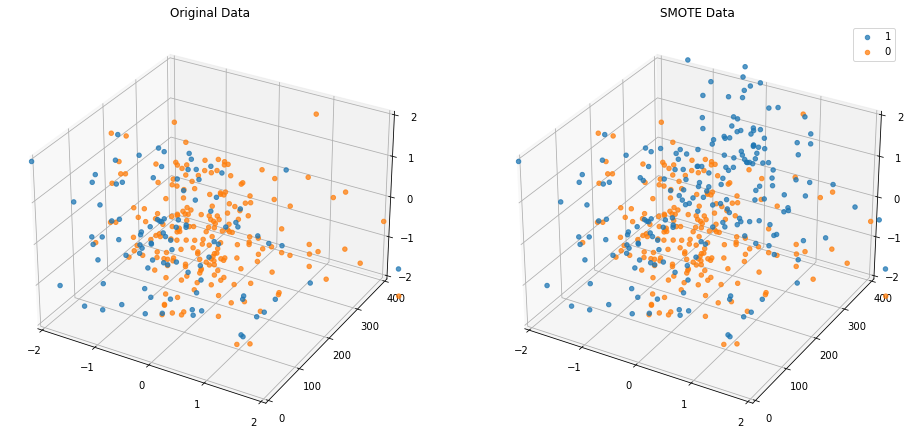

In [30]:
counter = Counter(y) 

# transform the dataset
oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X, y)
df_sm = X_sm.copy()
df_sm['DEATH_EVENT'] = y_sm
smote_counter = Counter(y_sm)

## Visualise the oversampling ## 
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax = [ax1, ax2]
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    ax1.scatter(X.loc(axis=0)[row_ix]["platelets"],
                    [row_ix], 
                    X.loc(axis=0)[row_ix]["age"],
                    label=str(label),
                    alpha=0.75)
                    
for label_sm, _ in smote_counter.items():
    row_ix_sm = np.where(y_sm == label_sm)[0]
    ax2.scatter(X_sm.loc(axis=0)[row_ix_sm]["platelets"], 
                    [row_ix_sm],
                    X_sm.loc(axis=0)[row_ix_sm]["age"],
                    label=str(label_sm), alpha=0.75)

for axi in ax:
    axi.set_zlim(-2,2)
    axi.set_xlim(-2,2)
    axi.set_ylim(0,400)
    axi.set_xticks([-2,-1,0,1,2])
    axi.set_yticks([0,100,200,300,400])
    axi.set_zticks([-2,-1,0,1,2])
    
ax1.set_title("Original Data")
ax2.set_title("SMOTE Data")
plt.legend()
plt.show()

In [31]:
df_mod_sm = df_mod.copy()

for model in models:

    cv_results = cross_validate(model, X_sm, y_sm, cv=cv, scoring="f1", return_train_score = True)
    
    # Adding 1 to the max index instead of appending so I can pass everything as a dict()
    df_mod_sm.loc(axis=0)[df_mod_sm.index.values.max()+1] = {
            'Name':model.__class__.__name__,
            'Parameters':str(model.get_params()),
            'Time':cv_results['fit_time'].mean(),
            'Train Accuracy':cv_results['train_score'].mean(),
            'Test Score':cv_results['test_score'].mean(),
            'feat_set':'SMOTE'
             }

In [32]:
df_mod_sm.drop([12],inplace = True)

In [33]:
top_model_names = df_mod_sm.sort_values('feat_set', ascending=False).sort_values('Test Score', ascending=False)['Name'][:3].values
top_models = [m for m in models if m.__class__.__name__ in top_model_names]

# Initialize a DataFrame to contain the importances of each feature for each model
df_imp = pd.DataFrame(index=range(0,len(X_sm.columns)*len(top_models)), columns=['feature','model','importance'])

# len_feat will allow us to populate the features for each model
len_feat = int(len(X_sm.columns))

for i in range(len(top_models)):
    results = permutation_importance(top_models[i].fit(X_sm, y_sm), X_sm, y_sm, scoring="f1", 
                                n_repeats=10, n_jobs=None, 
                                random_state=RANDOM_STATE)   
    df_imp.loc[range(len_feat*i,len_feat*(i+1)),'importance'] = (results['importances_mean'])
    df_imp.loc[range(len_feat*i,len_feat*(i+1)),'model'] = top_models[i].__class__.__name__
    df_imp.loc[range(len_feat*i,len_feat*(i+1)),'feature'] = X_sm.columns

In [34]:
fig = px.bar(data_frame=df_imp.sort_values('importance'), 
             x="importance", 
             y="feature", 
             color="model",
             barmode="group",
             orientation="h",
             template = "plotly_white"
             )
fig.show()

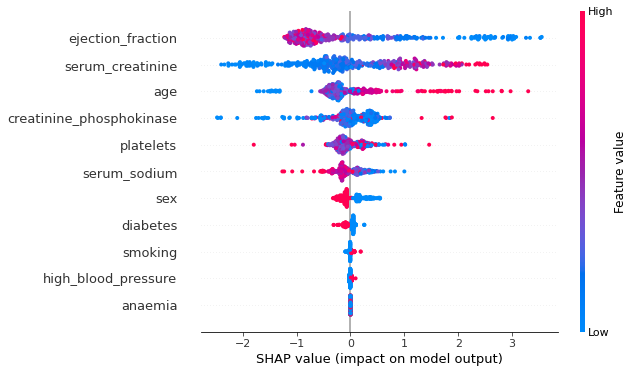

In [35]:
shap.initjs()
explainer = shap.TreeExplainer(top_models[2].fit(X_sm, y_sm))
shap_values = explainer.shap_values(X_sm)
shap.summary_plot(shap_values, features=X_sm, feature_names=X_sm.columns)

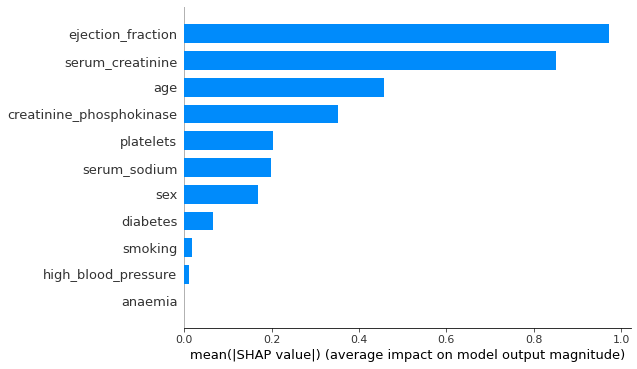

In [36]:
shap.summary_plot(shap_values, features=X_sm, 
                        feature_names=X_sm.columns, 
                        plot_type="bar")

In [37]:
feats = []

df_mod_sm_f = df_mod_sm[df_mod_sm['Name'].isin(top_model_names)].copy()

for j in [1,6]:
    feats.append(X_sm.columns[np.argsort(np.abs(shap_values).mean(0))][::-1][:j+1].values)

for i,feat in enumerate(feats):    
    for model in top_models:
        cv_results = cross_validate(model, X_sm.loc(axis=1)[feat], y_sm, cv=cv, 
                                    scoring="f1", return_train_score = True)

        # Adding 1 to the max index instead of appending so I can pass everything as a dict()
        df_mod_sm_f.loc(axis=0)[df_mod_sm_f.index.values.max()+1] = {
                'Name':model.__class__.__name__,
                'Parameters':str(model.get_params()),
                'Time':cv_results['fit_time'].mean(),
                'Train Accuracy':cv_results['train_score'].mean(),
                'Test Score':cv_results['test_score'].mean(),
                'feat_set': f"SMOTE {len(feat)}-Feature"
                 }

In [38]:
fig = px.bar(data_frame = df_mod_sm_f.sort_values('Test Score', ascending=True),
             x="Name", y="Test Score", color="feat_set", barmode="group",
             color_discrete_sequence=px.colors.qualitative.D3,
             template = "plotly_white")
fig.show()

## Random forest 

In [39]:
rf_param_space = {"n_estimators" : [2000, 5000],
                  "criterion":["gini"], 
                  "max_depth":[9, 18],
                  "min_samples_split": [2, 6]}

random_forest = RandomForestClassifier(random_state=RANDOM_STATE)

rf_gscv = HalvingGridSearchCV(estimator=random_forest, param_grid=rf_param_space,
                   cv = 10, scoring = "f1", n_jobs = -1,verbose = 1, random_state=RANDOM_STATE)

# rf_gscv = GridSearchCV(estimator=random_forest, param_grid=rf_param_space,
#                    cv = cv, n_jobs=-1, scoring = "f1", verbose = 1)

print('Running GridSearchCV for Random Forest Classifier...')
rf_gscv.fit(X_sm.loc(axis=1)[feats[1]], y_sm)

print("best estimator: ", rf_gscv.best_estimator_)
print("best parameters: ", rf_gscv.best_params_)
print("best score: ",rf_gscv.best_score_)

Running GridSearchCV for Random Forest Classifier...
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 135
max_resources_: 406
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 8
n_resources: 135
Fitting 10 folds for each of 8 candidates, totalling 80 fits
----------
iter: 1
n_candidates: 3
n_resources: 405
Fitting 10 folds for each of 3 candidates, totalling 30 fits
best estimator:  RandomForestClassifier(max_depth=18, min_samples_split=6, n_estimators=5000,
                       random_state=2)
best parameters:  {'criterion': 'gini', 'max_depth': 18, 'min_samples_split': 6, 'n_estimators': 5000}
best score:  0.8144806144018533


## XGBOOST

In [40]:
xgb_param_space = {"n_estimators":[100, 500],
                   "subsample" : [0.5, 1.0],
                   "max_depth" : [9, 18],
                   "eta" : [0.25, 0.75]}

xgboost = XGBClassifier(use_label_encoder=False, random_state=RANDOM_STATE, eval_metric='logloss')

# xgb_gscv = HalvingGridSearchCV(estimator=xgboost, param_grid=xgb_param_space,
#                    cv = cv, scoring = "f1", n_jobs = -1,verbose = 1, random_state=RANDOM_STATE)

xgb_gscv = GridSearchCV(estimator=xgboost, param_grid=xgb_param_space,
                   cv = 10, n_jobs=-1, scoring = "f1", verbose = 1)

# ------- Uncomment code below to run grid search for XGBoost -------
print('Running GridSearchCV for XGBoost Classifier...')
xgb_gscv.fit(X_sm.loc(axis=1)[feats[1]], y_sm)

print("best estimator: ", xgb_gscv.best_estimator_)
print("best parameters: ", xgb_gscv.best_params_)
print("best score: ", xgb_gscv.best_score_)

xgb_gscv.best_params_['use_label_encoder'] = False
xgb_gscv.best_params_['eval_metric'] = 'logloss'
xgb_gscv.best_params_['random_state'] = RANDOM_STATE
tuned_xgb = XGBClassifier(**xgb_gscv.best_params_)

Running GridSearchCV for XGBoost Classifier...
Fitting 10 folds for each of 16 candidates, totalling 160 fits
best estimator:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.25,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.25, max_delta_step=0,
              max_depth=18, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=2, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.5, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)
best parameters:  {'eta': 0.25, 'max_depth': 18, 'n_estimators': 100, 'subsample': 0.5}
best score:  0.7996727534702577


## Gradient Boosting. 

In [41]:
gb_param_space = {"n_estimators" : [1000, 2500],
                  "subsample" : [0.5, 1.0],
                  "max_depth":[9, 18],
                  "learning_rate" : [0.025, 0.75]}

grad_boost = GradientBoostingClassifier(random_state=RANDOM_STATE)

gb_gscv = HalvingGridSearchCV(estimator=grad_boost, param_grid=gb_param_space,
                   cv = 10, scoring = "f1", n_jobs = -1,verbose = 1, random_state=RANDOM_STATE)

# gb_gscv = GridSearchCV(estimator=grad_boost, param_grid=gb_param_space,
#                    cv = cv, n_jobs=-1, scoring = "f1", verbose = 1)

print('Running GridSearchCV for Gradient Boosting Classifier...')
gb_gscv.fit(X_sm.loc(axis=1)[feats[1]], y_sm)

print("best estimator: ", gb_gscv.best_estimator_)
print("best parameters: ", gb_gscv.best_params_)
print("best score: ", gb_gscv.best_score_)

Running GridSearchCV for Gradient Boosting Classifier...
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 45
max_resources_: 406
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 16
n_resources: 45
Fitting 10 folds for each of 16 candidates, totalling 160 fits
----------
iter: 1
n_candidates: 6
n_resources: 135
Fitting 10 folds for each of 6 candidates, totalling 60 fits
----------
iter: 2
n_candidates: 2
n_resources: 405
Fitting 10 folds for each of 2 candidates, totalling 20 fits
best estimator:  GradientBoostingClassifier(learning_rate=0.025, max_depth=18, n_estimators=1000,
                           random_state=2, subsample=0.5)
best parameters:  {'learning_rate': 0.025, 'max_depth': 18, 'n_estimators': 1000, 'subsample': 0.5}
best score:  0.8203358930727054


In [42]:
rf_gscv.best_params_['random_state'] = RANDOM_STATE
gb_gscv.best_params_['random_state'] = RANDOM_STATE

tuned_rf = RandomForestClassifier(**rf_gscv.best_params_)
tuned_gb = GradientBoostingClassifier(**gb_gscv.best_params_)
tuned_xgb = XGBClassifier(verbosity=0, use_label_encoder = False, 
                        random_state=RANDOM_STATE, eval_metric='logloss')

tuned_models = [tuned_rf, tuned_gb, tuned_xgb] 

df_final = pd.DataFrame(index = range(len(tuned_models)) ,
                        columns = ['Name',
                                   'Parameters',
                                   'Time', 
                                   'F1 Score', 
                                   'Precision', 
                                   'Recall',
                                   'Accuracy',
                                   'roc_auc',
                                   'fpr',
                                   'tpr'
                                  ])

for i, model in enumerate(tuned_models):
    cv_results = cross_validate(model, X_sm.loc(axis=1)[feats[1]], y_sm, cv=cv, 
                                scoring=["f1", "precision", "recall", "roc_auc", "accuracy"],
                                return_train_score = True)

    # Adding 1 to the max index instead of appending so I can pass everything as a dict()
    df_mod_sm_f.loc(axis=0)[df_mod_sm_f.index.values.max()+1] = {
            'Name':model.__class__.__name__,
            'Parameters':str(model.get_params()),
            'Time':cv_results['fit_time'].mean(),
            'Train Accuracy':cv_results['train_accuracy'].mean(),
            'Test Score':cv_results['test_f1'].mean(),
            'feat_set': f"SMOTE {len(feats[1])}-Feature (Tuned)"
             }
    
    # Gather data needed for ROC Curves
    y_pred = cross_val_predict(model, X_sm.loc(axis=1)[feats[1]], y_sm, cv=10, method='predict_proba')  
    fpr, tpr, thresholds = roc_curve(y_sm, y_pred[:,1])
    roc_auc = auc(fpr, tpr)
    
    # Adding 1 to the max index instead of appending so everything can pass as a dict()
    df_final.loc(axis=0)[i] = {
            'Name':model.__class__.__name__,
            'Parameters':str(model.get_params()),
            'Time':cv_results['fit_time'].mean(),            
            'F1 Score':cv_results['test_f1'].mean(),
            'Precision':cv_results['test_precision'].mean(),
            'Recall':cv_results['test_recall'].mean(),
            'Accuracy':cv_results['test_accuracy'].mean(),
            'roc_auc':roc_auc,
            'fpr':fpr,
            'tpr':tpr
             }

In [43]:
fig = px.bar(data_frame = df_mod_sm_f.sort_values('Test Score', ascending=True),
             x="Name", y="Test Score", color="feat_set", barmode="group",
             color_discrete_sequence=px.colors.qualitative.D3,
             template = "plotly_white")
fig.show()

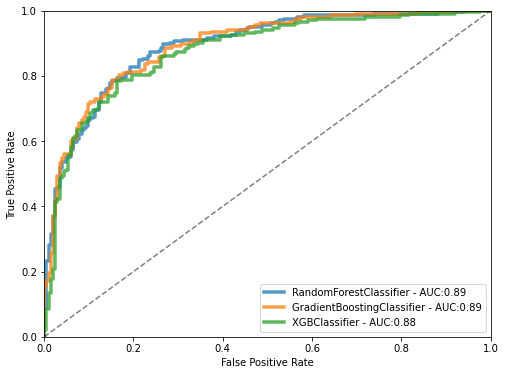

In [44]:
lw=3.5
plt.figure(figsize=(8,6))

[plt.plot(df_final['fpr'][i], df_final['tpr'][i], 
          label = f"{df_final['Name'][i]} - AUC:{df_final['roc_auc'][i]:.2f}",
          linewidth=lw, alpha=0.75) for i in range(len(df_final))]

plt.plot([0,1],[0,1],'--k', alpha=0.5)
plt.xlim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim(0,1)
plt.legend()
plt.show()

In [45]:
df_final_melt = df_final.melt(value_vars = [
    "F1 Score", 
    "Precision", 
    "Recall", 
    "roc_auc", 
    "Accuracy"], id_vars="Name")

fig = px.bar(data_frame = df_final_melt.sort_values('value', ascending=True),
             x="variable", y="value", color="Name", barmode="group",
             color_discrete_sequence=px.colors.qualitative.Plotly,
             template = "plotly_white")
fig.show()

# Saving the randomforest model for deployment and prediction. 

## 1) We need to standarize (scale) the values before making the prediction with those values. 

In [46]:
column_names = X_sm.loc(axis = 1)[feats[1]].columns
print(column_names)

Index(['ejection_fraction', 'serum_creatinine', 'age',
       'creatinine_phosphokinase', 'platelets', 'serum_sodium', 'sex'],
      dtype='object')


## These are the features with which the prediction will be made

In [47]:
feature_names = column_names.to_list()
print(feature_names)

['ejection_fraction', 'serum_creatinine', 'age', 'creatinine_phosphokinase', 'platelets', 'serum_sodium', 'sex']


## Example of an user input for the prediction. ( This is in the same order as the feature_names listed above)

In [10]:
non_scaled_input = [23,1.9,62.0,160,162000.00,118,0]

In [11]:
predict_features = [(non_scaled_input[i] - np.mean(df[feature_names[i]]))/(np.std(df[feature_names[i]])) for i in range(len(feature_names))]

NameError: name 'feature_names' is not defined

## Here are the resulting standarized input feature values. 

In [50]:
predict_features

[-1.2766457317484199,
 0.49005698738052217,
 0.09819930129953326,
 -0.4354858643860639,
 -2.697219911097439,
 36744.60388951345,
 245.84597354821048]

# 2) Train the best model. 

In [51]:
random_forest_model = tuned_rf.fit(X_sm.loc(axis = 1)[feats[1]],y_sm)

# 3) Save the model. 

In [2]:
pickle.dump(random_forest_model, open('randomForest.pkl', 'wb'))

NameError: name 'pickle' is not defined

# 4) Load the model. 

In [4]:
random_forest_model = pickle.load(open('randomForest.pkl','rb'))

In [5]:
random_forest_model

RandomForestClassifier(max_depth=18, min_samples_split=6, n_estimators=5000,
                       random_state=2)

# 5) Making the prediction for those input feature values. 

In [55]:
final_prediction = random_forest_model.predict([predict_features])
print(final_prediction)

[1]


# 6) Making the probability prediction for those input features. 

In [56]:
final_proba_prediction = random_forest_model.predict_proba([predict_features])
print(np.max(final_proba_prediction))

0.6355876290376292


## Second prediction with non scaled features. 

In [13]:
final_prediction_2 = random_forest_model.predict([non_scaled_input])
print(final_prediction_2)

[1]


In [14]:
final_proba_prediction_2 = random_forest_model.predict_proba([non_scaled_input])
print(np.max(final_proba_prediction_2))

0.5783690731490729
